### CONFIGURATION

In [77]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 20)
import numpy as np
import os
import copy
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# Hartwig imports
sys.path.append("/Users/peterpriestley/hmf/repos/scripts/analysisscripts") 
import analyseVCF as aVCF
import venn as vn

In [52]:
# LOAD BED
#BED_PATH = "/Users/peterpriestley/hmf/analyses/giabTruthsets/"
#BED_FILE_NAME = "NA12878_GIAB_highconf_IllFB-IllGATKHC-CG-Ion-Solid_ALLCHROM_v3.2.2_highconf.bed"
BED_PATH = "/Users/peterpriestley/hmf/analyses/slices/"  
#BED_FILE_NAME = "HMF_Slicing.bed"
BED_FILE_NAME = "cosmicCancerCensus.bed"
USE_BED = True
LOAD_FULL_FILE = True

### Functions

In [53]:
def findFiles(path,suffix):
    files=[]
    for x in os.listdir(path):
        if x[-len(suffix):] == suffix:
            files.append(x)
    return files

In [94]:
def AFByPosPlot(pos,AF,startChartPos,endChartPos):
    plt.figure(figsize=[18,5])
    plt.scatter(pos, AF)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.axis([startChartPos, endChartPos,0, 1.0])
    plt.show()

In [54]:
def loadVCF(path,filename,sampleNames,patientID):
    df = pd.DataFrame()
    if USE_BED:
        bed = aVCF.loadBEDFile(BED_PATH,BED_FILE_NAME)
        return pd.concat([df,aVCF.loadVariantsFromVCF(path,filename,sampleNames,patientID,True,True,bed,LOAD_FULL_FILE)])
    else:
        return pd.concat([df,aVCF.loadVariantsFromVCF(path,filename,sampleNames,patientID,True)])

<h3> Load VCFs and Prepare DF

In [120]:
PATH = "/Users/peterpriestley/hmf/analyses/v1.12samples/CPCT02010506/"
patientID = "CPCT02010506T"

In [121]:
svVCFFilename = findFiles(PATH,"somaticSV.vcf")[0]
print "SV =",svVCFFilename
print "patient =",patientID

SV = somaticSV.vcf
patient = CPCT02010506T


In [122]:
dfSV = loadVCF(PATH,svVCFFilename,{patientID:'tumor'},patientID)

reading vcf file: somaticSV.vcf
reading VCF File line: 1
Number variants loaded: 200


In [123]:
pd.pivot_table(dfSV[(dfSV.variantSubType<>"IGN")&(dfSV.tumorAF>=0.12)], values='id', index=['variantSubType'], columns=['variantType'], aggfunc='count').fillna("")

variantType,SV
variantSubType,
BND,6
DEL,11
INS,3
INV,1


### SLICING_REGION_VARIANTS

In [124]:
dfSV[(dfSV.bedRegion<>"")&(dfSV.variantSubType<>"IGN")][['chrom','pos','chromFrac','variantSubType','bedRegion','tumorallele','tumorAF','tumorSGT','tumorSVLenMin','tumorSVLenMax','tumorSVStartMin','tumorSVStartMax']]

,chrom,pos,chromFrac,variantSubType,bedRegion,tumorallele,tumorAF,tumorSGT,tumorSVLenMin,tumorSVLenMax,tumorSVStartMin,tumorSVStartMax
27,3,60465195,3.305345,DEL,FHIT,<DEL>,0.032787,177,49245,49247,60465195,60465196
186,20,57467588,20.911815,DEL,GNAS,<DEL>,0.122807,200,4115035,4115037,57467588,57467589


### TRANSLOCATIONS

In [128]:
def findendBreakpointPos():
    # For del, ins, inv
    pass


In [129]:
def findMatchingBNDChromPos(df):
    # can 
    df['BNDMatchPos'] = ""
    for i in range(0,df.shape[0]):
        if df.iloc[i]['variantSubType'] == "BND":
            tmp = df.iloc[i]['tumorallele'].find("]")
            if tmp >= 0:
                df.iloc[i,df.columns.get_loc('BNDMatchPos')] = df.iloc[i]['tumorallele'][tmp+1:df.iloc[i]['tumorallele'].find("]",tmp+1)]
    return df

In [130]:
dfSV = findMatchingBNDChromPos(dfSV)

In [131]:
dfSV[(dfSV.variantSubType<>"ABND")&(dfSV.tumorAF>=0.12)][['chrom','pos','chromFrac','variantSubType','bedRegion','BNDMatchPos','tumorallele','tumorAF','tumorSGT','tumorSVLenMin','tumorSVLenMax','tumorSVStartMin','tumorSVStartMax']]

,chrom,pos,chromFrac,variantSubType,bedRegion,BNDMatchPos,tumorallele,tumorAF,tumorSGT,tumorSVLenMin,tumorSVLenMax,tumorSVStartMin,tumorSVStartMax
13,1,142853427,1.573132,DEL,,,GT,0.120879,240,391,391,142853427,142853427
17,1,217622459,1.873107,DEL,,,<DEL>,0.122549,179,156367,156369,217622459,217622460
24,3,10207619,3.051548,DEL,,,<DEL>,0.120000,110,13700,13708,10207619,10207623
38,3,160479247,3.810409,DEL,,,<DEL>,0.210526,180,2150,2154,160479247,160479249
57,5,60969925,5.337008,DEL,,,<DEL>,0.120000,176,1199,1203,60969925,60969927
58,5,61021384,5.337293,DEL,,,<DEL>,0.176030,220,2330026,2330028,61021384,61021385
59,5,61026458,5.337321,IGN,,,<INV>,0.133574,240,2313396,2314916,61026078,61026839
60,5,61027277,5.337325,DEL,,,<DEL>,0.132701,183,2454745,2454747,61027277,61027278
61,5,62066647,5.343070,IGN,,,<INV>,0.128788,230,1294659,1294661,62066647,62066648
62,5,63295019,5.349860,BND,,,[20:32301194[GA,0.180982,267,-1,0,63295019,63295020


In [87]:
11/180.0

0.06111111111111111

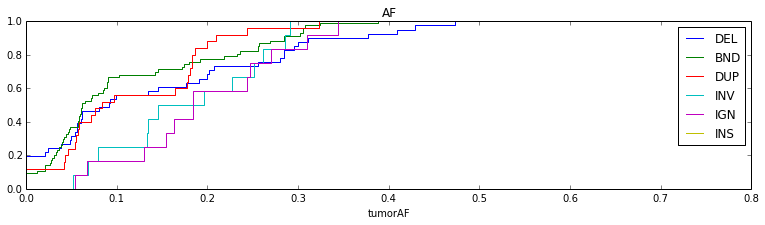

In [101]:
for variantSubType in dfSV.variantSubType.unique():
    ser = dfSV[(dfSV.variantSubType == variantSubType)]["tumorAF"].sort_values()
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser,name=variantSubType)
    ser_cdf.plot(drawstyle='steps',legend=True,title="AF",figsize=[13,3],xlim=[0.0,0.8],ylim=[0.0,1.0])